In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [3]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩(추천)
import pandas as pd # 원핫인코딩
from tensorflow.keras.models import Sequential, load_model # 모델 생성, 모델 load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 딥러닝 : 데이터의 규칙성을 추출

- 응용분야 : 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    - 지도학습 (독립=입력변수, 타겟=종속변수)
        - 분류분석(타겟변수가 category변수인 분석. 다중분류 vs 이진분류) vs 회귀분석
    - 비지도학습 (입력변수)
        - 군집화
    - 강화학습
    ------
- 지도학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋, 원핫인코딩
    - 3. 모델구성
    - 4. 모델 학습 과정 설정
    - 5. 모델 학습시키기(훈련, 검증데이터셋)
    - 6. 모델 평가하기(시험데이터셋)
    - 7. 모델 저장/사용(입력값이 주어지면 예측값을 받기)

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [8]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)


# 검증데이터, 시험데이터셋
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])

In [15]:
# 인고딩 종류
    # 라벨인코딩 : 문자를 숫자로
    # 원핫인코딩 : 값의 개수만큼 열을 만들고, 해당 범주에 해당하는 열에만 1을, 나머지는 0을

data = np.array(['a', 'b','c','b','b'])
print('원데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data)
print('원핫인코딩된 데이터 :\n', one_hot_encoding_data)

원데이터 : ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터 : [0 1 2 1 1]
원핫인코딩된 데이터 :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [21]:
# 원핫인코딩 (다 0이고 내 분류만 1. 분류분석을 위한 target변수)

data = np.array([1,4,5,4,5])
categorical_onehot = to_categorical(data) # 원핫인코딩결과가 numpy배열
print('to_categorical 이용\n', categorical_onehot)
print()
getdummies_onehot = pd.get_dummies(data) # 원핫인코딩결과가 DataFrame
print('get_dummies 이용\n', getdummies_onehot)
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

get_dummies 이용
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [24]:
# 분류분석을 위한 target변수 원핫인코딩(대문자일경우 종속변수가 여러개일때 변수 이름을 대문자로 사용)

Y_train = to_categorical(y_train)
Y_val   = to_categorical(y_val)

In [27]:
# 1개씩 있는게 90개 / 19개씩 있는게 90개 / 1개씩 있는게 9개 / 19개씩 있는게 9개
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성

In [28]:
# activation에 들어가는건 활성화함수 (교안 50page)
# 활성화함수 : relu, elu, tanh(이미지에서 많이씀), sigmoid(2진분류), softmax(출력층에서 사용)

model = Sequential()
model.add(Input(shape=(1,))) 
model.add(Dense(38, activation='sigmoid')) # 입력층
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(19, activation='softmax')) # 출력층. 입력층의 1과 출력층의 1은 숫자를 지켜줘야함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

- 회귀분석에서의 loss <b>:</b> mse, rmse(mse에 루트씌운것), mae
- 다중 분류분석에서의 loss <b>:</b> categorical_crossentropy

<!-- ![image](https://images.velog.io/images/woooa/post/81461be3-3e94-4cc8-bd83-9277836ea50d/image.png) -->

<img src="https://images.velog.io/images/woooa/post/81461be3-3e94-4cc8-bd83-9277836ea50d/image.png" width="800" style="text-align: left;">

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기

In [30]:
# batch_size는 한번에 학습하는양
# verbose=0 : 출력없음
# verbose=1 : 기본값 출력
# verbose=2 : epoch별 자세한 로그 출력

hist = model.fit(x_train, Y_train, epochs=300, batch_size=10, validation_data=(x_val, Y_val), verbose=2) 

Epoch 1/300
9/9 - 1s - loss: 2.8325 - accuracy: 0.0556 - val_loss: 2.6108 - val_accuracy: 0.1111 - 545ms/epoch - 61ms/step
Epoch 2/300
9/9 - 0s - loss: 2.5403 - accuracy: 0.1111 - val_loss: 2.4405 - val_accuracy: 0.1111 - 31ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 2.3979 - accuracy: 0.1111 - val_loss: 2.3149 - val_accuracy: 0.1111 - 30ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.2794 - accuracy: 0.1889 - val_loss: 2.2156 - val_accuracy: 0.2222 - 33ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.1965 - accuracy: 0.2333 - val_loss: 2.1353 - val_accuracy: 0.3333 - 36ms/epoch - 4ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1156 - accuracy: 0.2778 - val_loss: 2.0672 - val_accuracy: 0.3333 - 32ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0508 - accuracy: 0.3889 - val_loss: 2.0046 - val_accuracy: 0.4444 - 31ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9902 - accuracy: 0.4222 - val_loss: 1.9439 - val_accuracy: 0.3333 - 31ms/epoch - 3ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.4109 - accuracy: 0.9111 - val_loss: 0.3799 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3770 - accuracy: 1.0000 - val_loss: 0.3751 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3748 - accuracy: 1.0000 - val_loss: 0.3557 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3649 - accuracy: 1.0000 - val_loss: 0.3462 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3505 - accuracy: 1.0000 - val_loss: 0.3389 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3394 - accuracy: 1.0000 - val_loss: 0.3268 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3261 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3214 - accuracy: 1.0000 - val_loss: 0.3084 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0548 - accuracy: 1.0000 - val_loss: 0.0527 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0532 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0499 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 1.0000 - 27ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0485 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0490 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000 - 32ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evaluate)

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

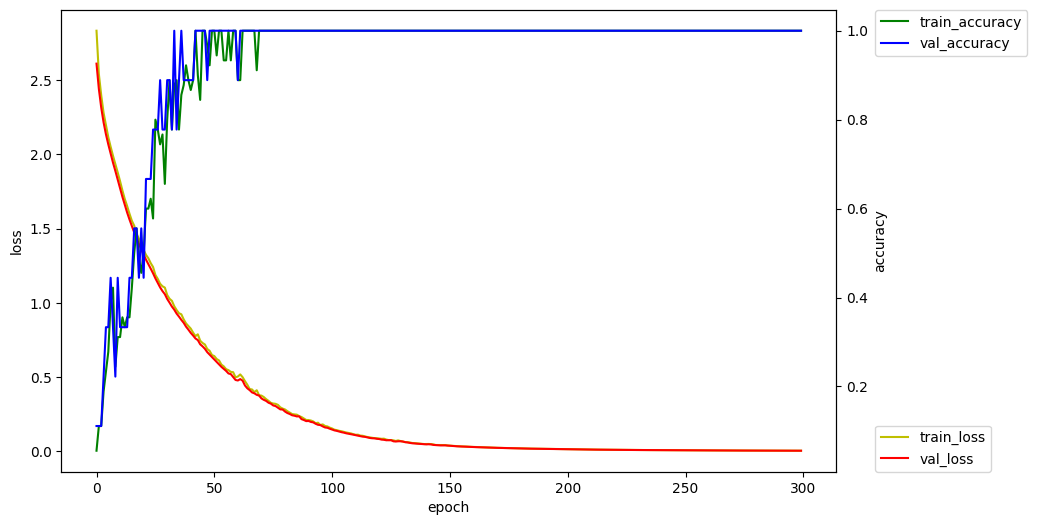

In [52]:
# 학습과정 표시하기

import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(bbox_to_anchor=(1.05, 0.1), loc=2, borderaxespad=0.)
acc_ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [54]:
# 모델 평가하기(테스트데이터셋으로 모델 학습 설정과정의 loss, metrics)

score = model.evaluate(x_val, Y_val, batch_size=3)
print('loss :', score[0])
print('accuracy :', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
loss : 0.0035135867074131966
accuracy : 1.0


# 7. 모델 사용하기(모델을 이용해서 예측하기)

In [55]:
# 바로 보기 힘들다
H = model.predict(np.array([2]))
H

1/1 [==============================] - 0s 70ms/step


array([[2.1771990e-29, 1.5044151e-26, 5.9618673e-04, 5.0199943e-26,
        9.9879968e-01, 1.1341028e-26, 6.0312235e-04, 2.1777371e-23,
        9.9738031e-07, 4.6168094e-26, 1.3896867e-13, 2.5701119e-26,
        3.5120726e-24, 7.9023117e-21, 0.0000000e+00, 1.7320471e-18,
        0.0000000e+00, 3.9241916e-32, 0.0000000e+00]], dtype=float32)

In [56]:
H = model.predict(np.array([2]))
H.argmax()

1/1 [==============================] - 0s 17ms/step


4

In [57]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 15ms/step


4

In [60]:
# 몇%의 확률로 4라고 예측했니?

H[0, H.argmax()]*100

99.87996816635132

In [62]:
# 2, 4, 6의 확률

H[0, [2,4,6]]*100

array([5.9618674e-02, 9.9879967e+01, 6.0312234e-02], dtype=float32)

# 7. 모델 저장

In [63]:
model.save('model/02_deep.h5')

In [64]:
# 저장된 모델 사용하기

model1 = load_model('model/02_deep.h5')

In [65]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 42ms/step


6